In [1]:
import numpy
from matplotlib import pyplot

%matplotlib inline

In [2]:
# set parameters
nx = 41
L = 2.0
dx = L / (nx -1)

nu = 0.3
sigma = 0.2
dt = sigma * dx**2 /nu
nt=20

In [3]:
x = numpy.linspace(0.0, L, num=nx)

In [4]:
u0 = numpy.ones(nx)
mask = numpy.where((x>=0.5)&(x<=1.0))
u0[mask] = 2.0

In [5]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1, nx -1 ):
        u[i] = un[i] + sigma * (un[i-1] - 2 * un[i] + un[i+1])
#         u[0]=1.0
#         u[-1]=1.0

u_naive = u

In [27]:
u = u0.copy()
for n in range(nt):
    un=u.copy()
    u[1:-1] = un[1:-1] + sigma *(un[:-2] - 2*un[1:-1] + un[2:])

In [28]:
numpy.allclose(u_naive,u)

True

In [45]:
def diffusion(u0, sigma=0.5,nt=20):
    u_hist = [u0.copy()]
    u=u0.copy()
    for n in range(nt):
        un=u.copy()
        u[1:-1]=un[1:-1] + sigma *(un[:-2] - 2*un[1:-1] + un[2:])
        u_hist.append(u.copy())
    return u_hist

In [46]:
u_hist = diffusion(u0, sigma=sigma, nt=nt)
len(u_hist)

21

In [47]:
def plot_solution(n, u_hist, x):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u_hist[0],label='initial')
    pyplot.plot(x, u_hist[n],label='Current')
    pyplot.legend()
    pyplot.xlim(0.0 , 2.0)
    pyplot.ylim(0.2, 2.5)
    pyplot.show()

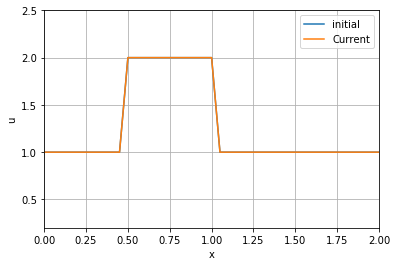

In [48]:
plot_solution(0,u_hist,x)

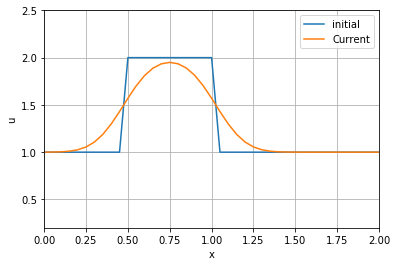

In [49]:
plot_solution(-1,u_hist,x)

In [50]:
import ipywidgets

In [51]:
nt_slider = ipywidgets.IntSlider(vlue=0,min=0,max=nt,step=1,description='Time step')
w = ipywidgets.interactive(plot_solution, n=nt_slider, u_hist= ipywidgets.fixed(u_hist),x=ipywidgets.fixed(x))

In [52]:
display(w)

interactive(children=(IntSlider(value=0, description='Time step', max=20), Output()), _dom_classes=('widget-in…